In [23]:
import pickle
import numpy as np
import sys
#base_dir = os.environ['AWEB_DIR']
sys.path.append("../../")
import config

In [24]:
#models = ["pt_SecRoBERTa","SecRoBERTa","pt_SecureBERT","SecureBERT","pt_gpt2-xl","gpt2-xl"]
models = ["pt_gpt2-xl", "gpt2-xl"]
result_dir = config.OUTPUT_DIR

attack_sim_list = []
weak_sim_list = []
for i in range(len(models)):
    analysis_model = models[i]
    output_dir = result_dir+"gcl_data/"+analysis_model
    file1 = open(output_dir+'/attack_text.pkl','rb')
    file2 = open(output_dir+'/weak_text.pkl','rb')
    attack_sim_list.append(pickle.load(file1))
    weak_sim_list.append(pickle.load(file2))

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
def histogram(cosine_sim_pairs, analysis_model):
    # Extract the cosine similarity values from the filtered results
    cosine_sim_values = [pair[1] for row in cosine_sim_pairs for pair in row]
    # Define the bins for the histogram
    bins = np.arange(0, 1.1, 0.05)  # Bins from 0 to 1 with step size 0.1
    plt.figure(figsize=(5, 3))
    # Create the histogram
    plt.hist(cosine_sim_values, bins=bins, edgecolor='black')
    
    # Set the x-axis and y-axis labels
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    xt = np.arange(0,1.1,0.1)
    plt.xticks(xt)
    
    # Set the title of the histogram
    plt.title('Attack to CWE Text Sim. in '+analysis_model)
    analysis_model = models[i]
    output_dir = result_dir+"gcl_data/"+analysis_model
    plt.savefig(output_dir+'/attack_cwe_text_sim_histogram.png',dpi=200)
    # Show the plot
    plt.show()

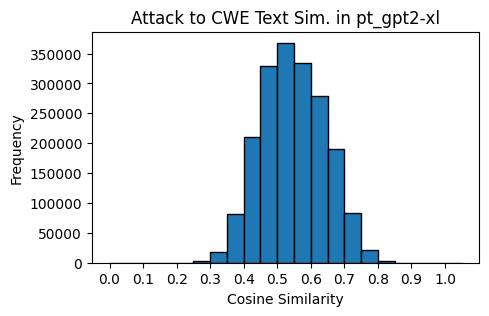

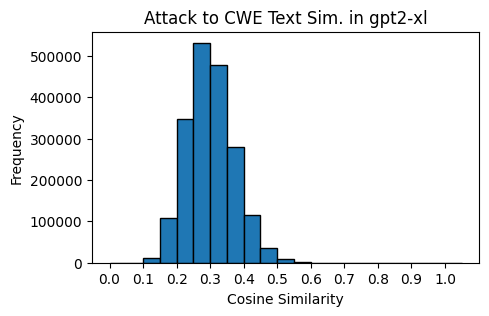

In [26]:
for i in range(len(models)):
    histogram(attack_sim_list[i], models[i])

In [5]:
# def intersection(list1, list2, k):
#     # Extract the first k indices from both lists
#     indices1 = [pair[0] for pair in list1[:k]]
#     indices2 = [pair[0] for pair in list2[:k]]
    
#     # Find the intersection of the two sets of indices
#     intersection_set = set(indices1).intersection(set(indices2))
    
#     # Return the size of the intersection set
#     return len(intersection_set)

In [6]:
# def intersect_plot(base, sim_list, isAttack):
#     dir3 = '../data/node_similarities/'+models[base]
#     k_list = [5,10,15,20,25]
#     markers = ['o', 's', '^', 'v', '<', '>']
#     colors = list(mcolors.TABLEAU_COLORS)
#     for m in range(len(sim_list)):
#         if(m==base):
#             continue
#         avg_intersect = []
#         for k in k_list:
#             sum_=0
#             for r in range(len(sim_list[m])):
#                 sum_+=intersection(sim_list[base][r], sim_list[m][r], k)
#             avg_intersect.append(sum_/len(sim_list[m]))
#         plt.plot(k_list, avg_intersect, label=models[m], marker=markers[m], color = colors[m])
#     plt.xlabel('k')
#     plt.ylabel('Average Hit@k')
#     plt.xticks(k_list)
#     plt.grid(True)
#     plt.legend()
#     plt.title('Average Hit@k Base: '+models[base])
    
#     if(isAttack):
#         plt.savefig(dir3+"/{}_attack_hit_k.png".format(models[m]), dpi=300, bbox_inches='tight')
#     else:
#         plt.savefig(dir3+"/{}_weak_hit_k.png".format(models[m]), dpi=300, bbox_inches='tight')
#     plt.show()

In [7]:
# intersect_plot(5, attack_sim_list,True)
# intersect_plot(5, weak_sim_list,False)


In [8]:
# import json
# with open("../../graph_network/data/bron_cwe_attack.json") as fp:
#     bron_cwe_attack = json.load(fp)

In [9]:
# bron_cwe_attack

In [10]:
# len(weak_sim_list[0])

In [11]:
# def plot_hit_k_graph(matrix1,matrix2, matrix3, isAttack):
    
#     # Initialize a dictionary to store average hit@k for each k
    
#     plt.figure(figsize=(5, 5))
#     # Loop over all the models
#     models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
#     #models = ["Gpt2"]
#     markers = ['o', 's', '^', 'v', '<', '>']
#     if(isAttack):
#         size = 203
#     else:
#         size = 933
#     all_hits = []
#     for j in range(1,len(models),2):
#         # Define the cosine similarity matrices
#         model = models[j]
#         cosine_matrix1 = matrix1
#         if(isAttack):
#             cosine_matrix2 = matrix2[j][:203,:203]
#             cosine_matrix3 = matrix3[j][:203,:203]
#         else:
#             cosine_matrix2 = matrix2[j][203:,203:]
#             cosine_matrix3 = matrix3[j][203:,203:]
#         # Loop over each k from 10 to 1136
#         average_hit_at_k1 = {}
#         average_hit_at_k2 = {}
#         for k in range(10, size,int(size/10)):
#             hit_at_k1 = []
#             hit_at_k2 = []
#             # Loop over each row
#             for i in range(size):
#                 # Get the indices of the top k values in the row for both matrices
#                 top_k_indices_1 = np.argsort(cosine_matrix1[i])[-k:]
#                 top_k_indices_2 = np.argsort(cosine_matrix2[i])[-k:]
#                 top_k_indices_3 = np.argsort(cosine_matrix3[i])[-k:]
                
#                 # Calculate the hit@k (number of common indices in top k)
#                 hit_count1 = len(set(top_k_indices_1) & set(top_k_indices_2))
#                 hit_count2 = len(set(top_k_indices_1) & set(top_k_indices_3))
#                 # print(set(top_k_indices_1))
#                 # print(set(top_k_indices_2))
                
#                 # Append the result to the list
#                 hit_at_k1.append(hit_count1)
#                 hit_at_k2.append(hit_count2)
#                 # print(hit_count)
#             # Calculate the average hit@k for the current k
#             average_hit_at_k1[k] = np.mean(hit_at_k1)
#             average_hit_at_k2[k] = np.mean(hit_at_k2)
        
#         # Plot the results
#         ks = list(average_hit_at_k1.keys())
#         hits1 = list(average_hit_at_k1.values())
#         hits2 = list(average_hit_at_k2.values())

#         plt.plot(ks, hits1, label=model+" our emb", marker=markers[j])
#         plt.plot(ks, hits2, label=model+" text emb", marker=markers[j])
#     plt.xlabel('k')
#     plt.ylabel('Average Hit@k')
#     plt.xticks(ks)
#     plt.grid(True)
#     plt.legend()
#     plt.title('Average Hit@k for Different Values of k')
#     plt.show()
#     if(isAttack):
#         plt.savefig(dir_name+"plots/text_hit@k_with_attack_graph.png", dpi=300, bbox_inches='tight')
#     else:
#         plt.savefig(dir_name+"plots/text_hit@k_with_weakness_graph.png", dpi=300, bbox_inches='tight')

In [12]:
# import matplotlib.colors as mcolors
# def histogram2(cosine_sim_pairs):
#     # print(len(cosine_sim_pairs))
#     # print(len(cosine_sim_pairs[0]))
#     # for row in cosine_sim_pairs:
#     #     print(row[0][1], row[1][1])
#     #Extract the cosine similarity values from the filtered results
#     #cosine_sim_values = [pair[1] for row in cosine_sim_pairs for pair in row[-30:]]
#     cosine_sim_values = [pair[1] for row in cosine_sim_pairs for pair in row if pair[1] >= 0.40]
    
#     # Define the bins for the histogram
#     bins = np.arange(0, 1.1, 0.1)  # Bins from 0 to 1 with step size 0.1
    
#     # Create the histogram
#     plt.hist(cosine_sim_values, bins=bins, edgecolor='black')
    
#     # Set the x-axis and y-axis labels
#     plt.xlabel('Cosine Similarity')
#     plt.ylabel('Frequency')
    
#     # Set the title of the histogram
#     plt.title('Attack->Weak Positive')
#     plt.savefig(dir2+'/histogram_attack_pos_t.png',dpi=300)
#     # Show the plot
#     plt.show()

In [13]:
# histogram2(attack_sim_list[5])

In [14]:
# colors = list(mcolors.TABLEAU_COLORS)
# colors

In [15]:
# weak_sim_list[5][0]

In [16]:
# attack_sim_list[0][0][[0,1,3]]